<a href="https://colab.research.google.com/github/diksha12p/Computer-Vision/blob/master/CV_Intern_Python_Impl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1

Q1: Use the following image to answer these questions:
1. Summarize the quality of the image. Recommend any preprocessing steps and implement them in a python script
2. Create a python script that segments the object in this image. Document and describe your recommended method
3. Describe how you would evaluate the success of your method


---




Part 1: 
The image has ‘Salt and Pepper Noise’ (Impulse Noise) all over as there exist random white (255 pixel value) and random dark (0 pixel value) all over the image.
The reason for occurrence of this type of noise is primarily either memory cell failure or malfunctioning pixel elements or synchronisation errors during image digitisation.

The preprocessing step to remove this type of noise is usage of ‘Median Filtering’. The primary reason for its high rate of success as compared to other filtering techniques like Gaussian and box filters is that the central element is always replaced by some pixel value in the image. (Also, edges are preserved which aids in the image segmentation part).
The output can be clearly seen as under:

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.io import imread, imsave

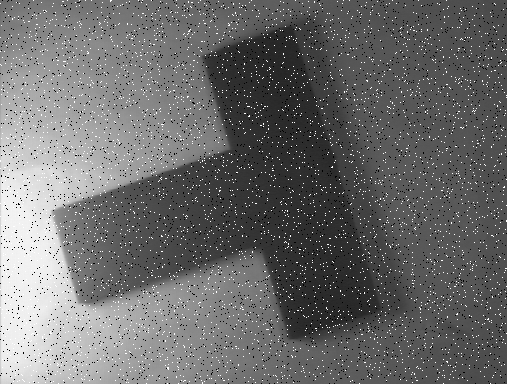

In [ ]:
img = cv2.imread('Q1.png')
cv2_imshow(img)

In [ ]:
median = cv2.medianBlur(img, 5)
compare = np.concatenate((img, median), axis=1)
imsave('median_output_Q1.jpg', median)

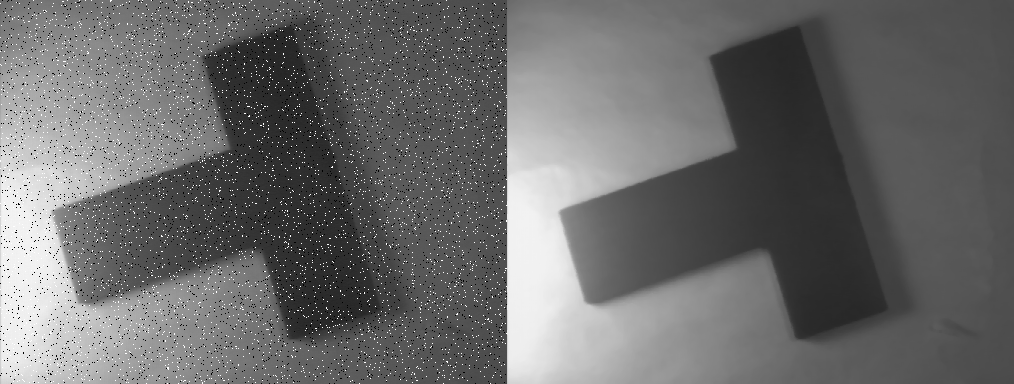

In [ ]:
cv2_imshow(compare)

**Part 2**. For segmentation purpose, the old school image segmentation method, ‘Edge Detection’ has ben used (Canny Edge Detection Algorithm). The reason for the same is existence of sharp changes or discontinuities in the brightness of the image.
The code lines used for the same and its corresponding output are as under:

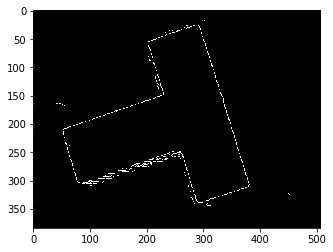

In [ ]:
# Question 1 - Part 2
# Choice of segmentation algorithm: Canny Edge Deetection

edges = cv2.Canny(median,35,35)
plt.imshow(edges,cmap = 'gray')

In [ ]:
imsave('edge_detection_output_Q1.jpg', edges)

**Part 3:** For evaluation of the success of the model, I would like to comment on the following evaluation metrics:

1.   Pixel Accuracy : It is refereed to as the percentage of pixels in the image classified correctly. In the segmented image above, qualitatively, most of the pixels have been identified in the segmented region. Thus, it has a good
accuracy.

2.   Intersection over Union (IoU) : It is defined as the ratio of the area of overlap between the segmented output and the ground truth to the area of the union. Here, the output is fairly close to the ground truth. Hence, the high numerator value will skew the result towards 1, which indicates good accuracy.

3. Dice Coefficient (F1 Score) : It is defined as twice the area of overlap to the summation of the number of pixels in both the images. By the above logic, we can also conclude that the model has a good accuracy.


# Question 2

Suppose we wish to segment the rectangular drain and the two circular manholes. Describe in detail how you would implement a traditional computer vision approach and a deep learning approach. Discuss the pros and cons of each.


---



For the segmentation purpose, we can use both traditional computer vision approach and the deep learning approach.
From the options available for classical computer vision approach, I tried various algorithms as the segmentation output wasn’t too satisfactory.

(For the pre-processing stage, I first converted the image from RGBA to Grayscale and then resized it which was followed by Gaussian Smoothing).

The following are the implementations of the classical computer vision segmentation methods deployed and their corresponding outputs:

Stage 1: Image Preprocessing

In [ ]:
from PIL import Image

png = Image.open('Q2.png')
png.load()

background = Image.new("RGB", png.size, (255, 255, 255))
background.paste(png, mask=png.split()[3]) # 3 is the alpha channel

background.save('RGB_Q2.png', 'PNG', quality=80)

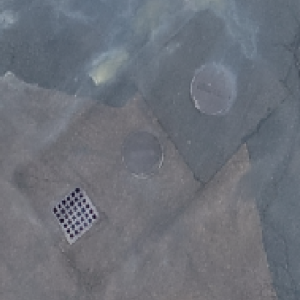

In [ ]:
image_here = cv2.imread('RGB_Q2.png')
new_height = 300
new_width = 300
new_dimension = (new_width, new_height)

# resize image
output = cv2.resize(image_here, new_dimension, interpolation = cv2.INTER_AREA)
cv2_imshow(output)
imsave('RGB_Q2_resized.png', output)

Implementation 1: Regional Based Segmentation

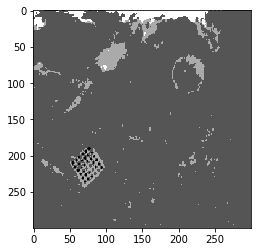

In [ ]:
# Regional Based Segmentation
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage
image = plt.imread('RGB_Q2_resized.png')
gray = rgb2gray(image)
gray_resize = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_resize.shape[0]):
    if gray_resize[i] > gray_resize.mean():
        gray_resize[i] = 3
    elif gray_resize[i] > 0.5:
        gray_resize[i] = 2
    elif gray_resize[i] > 0.25:
        gray_resize[i] = 1
    else:
        gray_resize[i] = 0
gray = gray_resize.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

Implementation 2: Edge Detection Segmentation (using Sobel Filters)

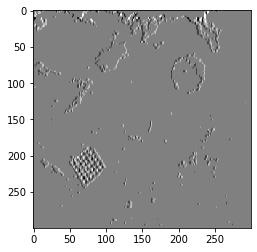

In [ ]:
# EDGE Detection Segmentation - using the sobel filters
# kernel for detecting horizontal edges
sobel_horizontal = np.array([np.array([1, 2, 1]), np.array([0, 0, 0]), np.array([-1, -2, -1])])
# kernel for detecting vertical edges 
sobel_vertical = np.array([np.array([-1, 0, 1]), np.array([-2, 0, 2]), np.array([-1, 0, 1])])
# laplacian kernel
kernel_laplace = np.array([np.array([1, 1, 1]), np.array([1, -8, 1]), np.array([1, 1, 1])])

out_v = ndimage.convolve(gray, sobel_vertical, mode='reflect')
plt.imshow(out_v, cmap='gray')



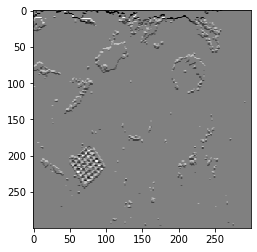

In [ ]:
out_h = ndimage.convolve(gray, sobel_horizontal, mode='reflect')
plt.imshow(out_h, cmap='gray')

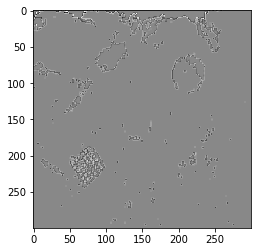

In [ ]:
out_l = ndimage.convolve(gray, kernel_laplace, mode='reflect')
plt.imshow(out_l, cmap='gray')

Implementation 3: Clustering Based Segmentation (k-means with k = 3)

In [ ]:
# Image Segmentation based on Clustering -- K-means
pic = plt.imread('RGB_Q2_resized.png')  
pic_n = pic.reshape(pic.shape[0]*pic.shape[1], pic.shape[2])
pic_n.shape

(90000, 3)

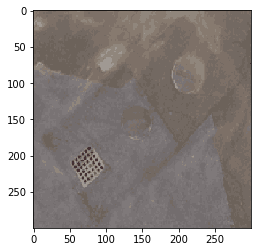

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(pic_n)
pic2show = kmeans.cluster_centers_[kmeans.labels_]
cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])
plt.imshow(cluster_pic)

Implementation 4: Felsenszwalb's efficient graph based image segment ation

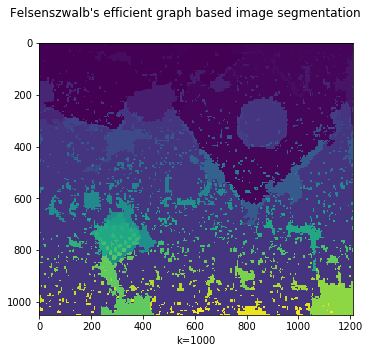

In [ ]:
# Felsenszwalb's efficient graph based image segmentation

import skimage.segmentation
from matplotlib import pyplot as plt
import imageio
from skimage.io import imread, imsave

img2 = imageio.imread("Q2.png", pilmode="L")
segment_mask1 = skimage.segmentation.felzenszwalb(img2, scale=100)
segment_mask2 = skimage.segmentation.felzenszwalb(img2, scale=1000)

fig = plt.figure(figsize=(12, 5))
fig_1 = fig.add_subplot(111)
fig_1.imshow(segment_mask2); fig_1.set_xlabel("k=1000")
fig.suptitle("Felsenszwalb's efficient graph based image segmentation")
plt.show()

Thus, we can say that of all the traditional segmentation methods deployed, k- means clustering based segmentation produces comparatively the best result as all the three drains are identified.

Also, the Felsenszwalb's image segmentation model also performs pretty well as if we look closely, we can see that even the mid circular drain has been segmented. I strongly feel that with better image preprocessing, this model can produced the desired result.

For the Deep Learning based segmentation, I would prefer Mask-RCNN framework. Since training our model on MS COCO dataset from scratch would take humongous time, we can use the pre trained weights available online and then do predictions in our model.

For the preferred method among the two, I would choose Deep Learning based model as it is trained on a variety of data and has more accurate results as compared to the traditional computer vision segmentation algorithms. The problem with the same being the complexity of implementation and memory requirement, which can be easily overcome with the latest state of the art.


# Question 3: 

Describe how you would analyze the following images. Create a python script which visualizes their features. How can you differentiate between all three objects?


---



Since all the three images roughly have the same image contours and are all irregular circles, the traditional contour detection algorithms like ‘Hough Transform’ and ‘Harris Corner Detection’ fail to produce insightful results.

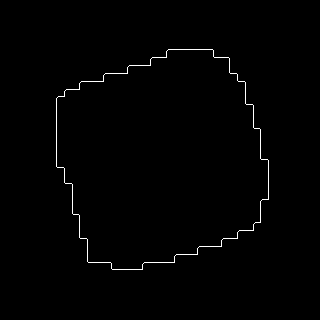

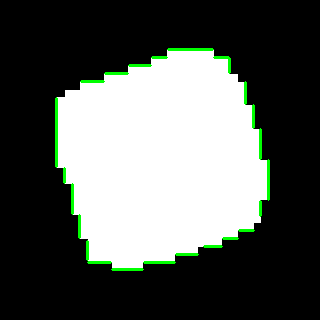

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img_1 = cv2.imread('Q3_1.png')
gray_1 = cv2.cvtColor(img_1,cv2.COLOR_BGR2GRAY)

edges_1 = cv2.Canny(gray_1,100,200,apertureSize = 3)
cv2_imshow(edges_1)

minLineLength = 30
maxLineGap = 10
lines_1 = cv2.HoughLinesP(edges_1,1,np.pi/180,15,minLineLength,maxLineGap)
for x in range(0, len(lines_1)):
    for x1,y1,x2,y2 in lines_1[x]:
        cv2.line(img_1,(x1,y1),(x2,y2),(0,255,0),2)

cv2_imshow(img_1)

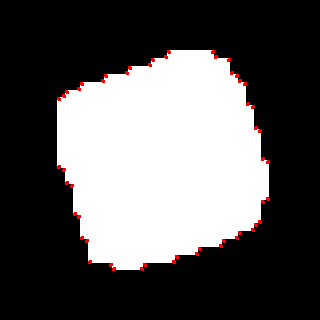

In [ ]:
# Harris Corner Detection Method 
  
import cv2 
image = cv2.imread('Q3_1.png') 
operatedImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
operatedImage = np.float32(operatedImage) 

dest = cv2.cornerHarris(operatedImage, 2, 5, 0.07) 
dest = cv2.dilate(dest, None) 
  
image[dest > 0.01 * dest.max()]=[0, 0, 255] 
cv2_imshow(image) 


Since all the images have roughly the same distribution for the black and white pixels, the same histogram is obtained. Thus, no intuition about the contrast, brightness, intensity distribution etc. of the image can be drawn. The histograms obtained for all the three images are as under:

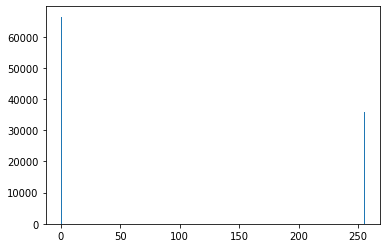

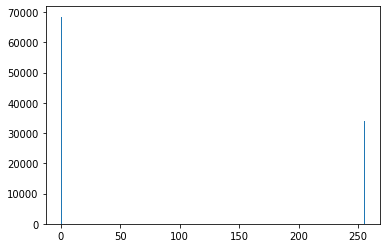

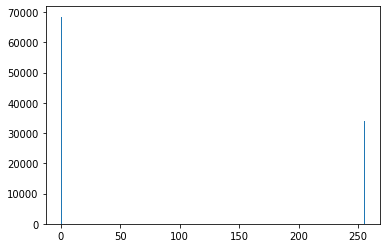

In [ ]:
# Histogram Plotting
import cv2 
from matplotlib import pyplot as plt 
img1 = cv2.imread('Q3_1.png',0) 
img2 = cv2.imread('Q3_2.png',0) 
img3 = cv2.imread('Q3_3.png',0) 

plt.hist(img1.ravel(),256,[0,256]) 
plt.show() 
plt.hist(img2.ravel(),256,[0,256]) 
plt.show() 
plt.hist(img2.ravel(),256,[0,256]) 
plt.show() 

Thus, I implemented the Histogram of Oriented Gradients (HOG) feature descriptor to visualise the shapes as it is useful for tasks like image recognition and object detection. The reason for he same is the usage of distribution (histograms) of directions of gradients (oriented gradients) as feature descriptors. Since the magnitude of gradients is large around the corners and edges, this method is particularly useful for the given scenario.

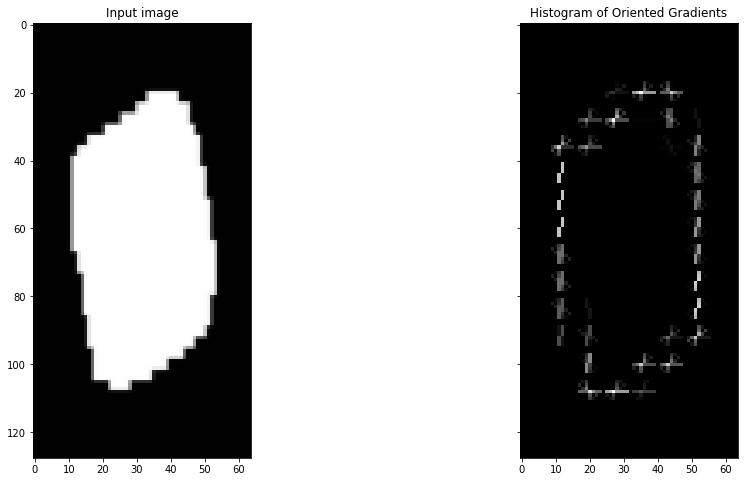

In [ ]:
# HOG Feature Descriptor

from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
%matplotlib inline

img_Q3 = imread('Q3_1.png')
# imshow(img_Q3)
# print(img_Q3.shape)

resized_img = resize(img_Q3, (128,64)) 
# imshow(resized_img) 
# print(resized_img.shape)

fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=True)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(resized_img, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

Here, the dominant direction of the histogram captures the shape of the object in the image. Thus, the direction of the lines denote the orientation while the length denotes the magnitude of the gradients.

Thus, we can easily differentiate between the three shapes on the basis of the histogram of their gradients.


# Question 4:

The following ​ordered​ list of coordinates make up the boundary of an object. Suppose we want to identify which coordinates in the following list are part of a curve or a line. Describe your recommended method and create a python script that segments these coordinates into either line nodes or curve nodes.

*`[(2909188.82323393, 295089.310985238), (2909218.73492388, 295099.942248533), (2909238.54659475, 295060.711218843), (2909239.25598031, 295060.711218843), (2909250.7637905, 295065.637507451), (2909253.60133274, 295065.795148686), (2909255.13833478, 295064.9675322), (2909255.57184818, 295064.415787876), (2909256.63592652, 295061.8541178), (2909256.63592652, 295060.514167299), (2909256.0841822, 295058.701293091), (2909254.03484613, 295056.65195703), (2909226.60527117, 295043.607144797), (2909223.80713924, 295043.094810781), (2909216.31918055, 295043.646555105), (2909213.48163831, 295044.828864371), (2909210.80173731, 295046.799379814), (2909207.96419507, 295050.07043545), (2909204.5354982, 295056.809598266), (2909202.7620343, 295056.927829192), (2909202.13146936, 295057.637214752), (2909190.11132516, 295086.958484546), (2909189.32311898, 295087.904331959)]`*



---



The idea implemented here is to calculate the second derivative of the function and observe when the value is (close to) zero. This is a generic way to find the linear parts in data sets. Once this value is computed, it is used as an input to the chi^2 method to identify the regions of interest in the data set.
Here, since the data points are finite and ordered representation of the boundaries of an object, the assumption that the data isn’t noisy can be used. Had it not been the case, kernel and its corresponding width would have been taken into consideration.

The idea implemented here to find the linear region in the data is very generic and mathematical. The shortcoming of my implementation is that the output obtained isn’t perfect. Playing around the values of the ‘minimum chi’ can definitely yield better results.

Here’s my implementation and its corresponding output:

In [ ]:
data_1 = [[2909188.82323393, 295089.310985238], [2909218.73492388, 295099.942248533], 
                [2909238.54659475, 295060.711218843], [2909239.25598031, 295060.711218843], 
                [2909250.7637905, 295065.637507451], [2909253.60133274, 295065.795148686], 
                [2909255.13833478, 295064.9675322], [2909255.57184818, 295064.415787876], 
                [2909256.63592652, 295061.8541178], [2909256.63592652, 295060.514167299], 
                [2909256.0841822, 295058.701293091], [2909254.03484613, 295056.65195703], 
                [2909226.60527117, 295043.607144797], [2909223.80713924, 295043.094810781], 
                [2909216.31918055, 295043.646555105], [2909213.48163831, 295044.828864371], 
                [2909210.80173731, 295046.799379814], [2909207.96419507, 295050.07043545], 
                [2909204.5354982, 295056.809598266], [2909202.7620343, 295056.927829192], 
                [2909202.13146936, 295057.637214752], [2909190.11132516, 295086.958484546], 
                [2909189.32311898, 295087.904331959]]
x, y = zip(*data_1)
x, y = map(list, zip(*data_1))

In [ ]:
import numpy as np
x = np.array([2909188.82323393, 2909218.73492388,
 2909238.54659475, 2909239.25598031, 2909250.7637905, 2909253.60133274,
 2909255.13833478, 2909255.57184818, 2909256.63592652, 2909256.63592652,
 2909256.0841822, 2909254.03484613, 2909226.60527117, 2909223.80713924,
 2909216.31918055, 2909213.48163831, 2909210.80173731, 2909207.96419507,
 2909204.5354982, 2909202.7620343, 2909202.13146936, 2909190.11132516, 
 2909189.32311898])
y = np.array([295089.310985238,
 295099.942248533,295060.711218843,295060.711218843,295065.637507451,
 295065.795148686, 295064.9675322,295064.415787876,295061.8541178,
 295060.514167299, 295058.701293091,295056.65195703,295043.607144797,
 295043.094810781,295043.646555105,295044.828864371,295046.799379814,
 295050.07043545,295056.809598266,295056.927829192, 295057.637214752, 
 295086.958484546,295087.904331959])

593.6670681248725
416.29345492860693
2.2593310246955283


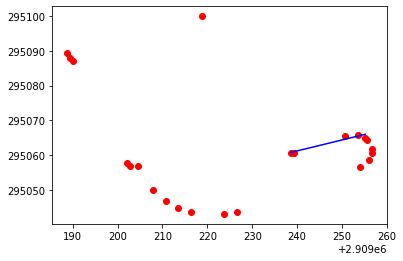

In [ ]:
from matplotlib.pyplot import figure, show
from numpy import pi, sin, linspace, exp, polyfit

num_points = len(x)
min_fit_length = 5
chi = 0

chi_min = 10000

i_best = 0
j_best = 0

for i in range(len(x) - min_fit_length):
    for j in range(i+min_fit_length, len(x)):

        coefs = polyfit(x[i:j],y[i:j],1)
        y_linear = x * coefs[0] + coefs[1]
        chi = 0
        for k in range(i,j):
            chi += ( y_linear[k] - y[k])**2

        if chi < chi_min:
            i_best = i
            j_best = j
            chi_min = chi
            print(chi_min)

coefs = polyfit(x[i_best:j_best],y[i_best:j_best],1)
y_linear = x[i_best:j_best] * coefs[0] + coefs[1]


fig = figure()
ax = fig.add_subplot(111)
ax.plot(x,y,'ro')
ax.plot(x[i_best:j_best],y_linear,'b-')


show()

The points along the ‘blue’ line in the image above can be segmented as ‘line nodes’ while the other points can be segmented as ‘curve nodes’.